In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

import seaborn as sns

In [5]:
file_path = "../data/external/laptops_details_train.csv"
data = pd.read_csv(file_path, encoding="utf-8", delimiter=",", low_memory=False)

In [20]:
data.head()

,Brand,Model,Series,Thickness,Dimensions (WxDxH),Weight,Colors,Operating System,Operating System Type,Display Size,...,Lockport,Battery Life,USB Type C,Battery Capacity,Aspect Ratio,Number of Cores,SSD Interface,Fast Charging Support,market_status,Price (Rs)
0,HP,14-dv0055TU (2N1L1PA),Pavilion,17 Millimeter thickness,325 x 216 x 17 mm,1.41 Kg weight (Light-weight),Tranquil Pink,Windows 10 Home Basic,64-bit,14 Inches (35.56 cm),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,71990.0
1,Acer,PHN16-71 (NH.QLTSI.002),Predator Helios Neo 16,26.5 Millimeter thickness,361 x 279 x 26.5 mm,2.6 Kg weight,Black,Windows 11 Home Basic,NaN,16 Inches (40.64 cm),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,105999.0
2,Dell,15 5570 (A560126WIN9),Inspiron 15,22.7 Millimeter thickness,380 x 258 x 22.7 mm,2.2 Kg weight,Platinum Silver,Windows 10 Home Basic,64-bit,15.6 Inches (39.62 cm),...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,54999.0
3,MSI,GV62 7RD-2297XIN,NaN,29 Millimeter thickness,383 x 260 x 29 mm,2.2 Kg weight,Black,DOS,64-bit,15.6 Inches (39.62 cm),...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,67990.0
4,Dell,15 3515 (D560702WIN9BE),Inspiron 15,23 Millimeter thickness,358.50 x 17.50 x 23 mm,1.8 Kg weight,"Carbon Black, Platinum Silver",Windows 11 Home Basic,64-bit,15.6 Inches (39.62 cm),...,NaN,7 Hrs,2.0,NaN,NaN,NaN,NaN,NaN,Available,42210.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8198 entries, 0 to 8197
Data columns (total 76 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand                       8198 non-null   object 
 1   Model                       8198 non-null   object 
 2   Series                      7105 non-null   object 
 3   Thickness                   7518 non-null   object 
 4   Dimensions (WxDxH)          7516 non-null   object 
 5   Weight                      7891 non-null   object 
 6   Colors                      8022 non-null   object 
 7   Operating System            8198 non-null   object 
 8   Operating System Type       4678 non-null   object 
 9   Display Size                8195 non-null   object 
 10  Display Resolution          8166 non-null   object 
 11  Pixel Density               8164 non-null   object 
 12  Display Type                4308 non-null   object 
 13  Display Features            8066 

In [24]:
numeric_df = data.select_dtypes(include=[np.number])
display(numeric_df.describe())

,Wi-Fi Version,Bluetooth Version,USB 2.0 slots,Ethernet ports,USB 3.0 slots,USB Type C,Number of Cores,Price (Rs)
count,8124.000000,7380.000000,3225.000000,3444.000000,2223.000000,5191.000000,2925.000000,8177.000000
mean,5.454702,4.859404,1.328062,1.000581,1.692308,1.216336,8.917607,80852.045738
std,0.630616,0.475121,0.494043,0.024095,0.714243,0.450231,4.554171,59390.288254
min,4.000000,2.100000,1.000000,1.000000,1.000000,1.000000,2.000000,8990.000000
25%,5.000000,4.200000,1.000000,1.000000,1.000000,1.000000,6.000000,42490.000000
50%,5.000000,5.000000,1.000000,1.000000,2.000000,1.000000,8.000000,64989.000000
75%,6.000000,5.200000,2.000000,1.000000,2.000000,1.000000,12.000000,96990.000000
max,7.000000,6.000000,3.000000,2.000000,6.000000,4.000000,24.000000,499990.000000


In [25]:
missing_values = data.isnull().sum()
display(missing_values[missing_values > 0])

Series                   1093
Thickness                 680
Dimensions (WxDxH)        682
Weight                    307
Colors                    176
                         ... 
Aspect Ratio             6869
Number of Cores          5273
SSD Interface            6145
Fast Charging Support    7258
Price (Rs)                 21
Length: 70, dtype: int64

In [9]:
missing_percent = data.isnull().mean() * 100
display(missing_percent[missing_percent > 0].sort_values(ascending=False))

Fast Charging Support    88.533789
Thunderbolt Port         87.887290
Chipset                  87.179800
Aspect Ratio             83.788729
Lockport                 81.288119
                           ...    
Price (Rs)                0.256160
Microphone Jack           0.207368
Headphone Jack            0.170773
Sales Package             0.170773
Display Size              0.036594
Length: 70, dtype: float64

In [10]:
data = data.dropna(subset=['Price (Rs)'])

In [11]:
# Convertir la columna a numérico
data['Price (Rs)'] = pd.to_numeric(data['Price (Rs)'], errors='coerce')

In [14]:
# Eliminar los valores nulos
data = data.dropna(subset=['Price (Rs)'])

In [56]:
# Conversión a dólares
exchange_rate = 83.5
data['Price (USD)'] = data['Price (Rs)'] / exchange_rate

display(data.head())

,Brand,Model,Series,Thickness,Dimensions (WxDxH),Weight,Colors,Operating System,Operating System Type,Display Size,...,Battery Life,USB Type C,Battery Capacity,Aspect Ratio,Number of Cores,SSD Interface,Fast Charging Support,market_status,Price (Rs),Price (USD)
0,HP,14-dv0055TU (2N1L1PA),Pavilion,17 Millimeter thickness,325 x 216 x 17 mm,1.41 Kg weight (Light-weight),Tranquil Pink,Windows 10 Home Basic,64-bit,14 Inches (35.56 cm),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,71990.0,862.155689
1,Acer,PHN16-71 (NH.QLTSI.002),Predator Helios Neo 16,26.5 Millimeter thickness,361 x 279 x 26.5 mm,2.6 Kg weight,Black,Windows 11 Home Basic,NaN,16 Inches (40.64 cm),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,105999.0,1269.449102
2,Dell,15 5570 (A560126WIN9),Inspiron 15,22.7 Millimeter thickness,380 x 258 x 22.7 mm,2.2 Kg weight,Platinum Silver,Windows 10 Home Basic,64-bit,15.6 Inches (39.62 cm),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,54999.0,658.670659
3,MSI,GV62 7RD-2297XIN,NaN,29 Millimeter thickness,383 x 260 x 29 mm,2.2 Kg weight,Black,DOS,64-bit,15.6 Inches (39.62 cm),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,67990.0,814.251497
4,Dell,15 3515 (D560702WIN9BE),Inspiron 15,23 Millimeter thickness,358.50 x 17.50 x 23 mm,1.8 Kg weight,"Carbon Black, Platinum Silver",Windows 11 Home Basic,64-bit,15.6 Inches (39.62 cm),...,7 Hrs,2.0,NaN,NaN,NaN,NaN,NaN,Available,42210.0,505.508982


In [18]:
# Para el modelamiento se selecciona estas columnas y se elimina las filas con valores nulos
model_features = ['Wi-Fi Version', 'Bluetooth Version', 'USB 2.0 slots', 'Ethernet ports', 'USB 3.0 slots', 'Number of Cores']

for feature in model_features:
    if feature in data.columns:
        data[feature] = pd.to_numeric(data[feature], errors='coerce')

data_model = data.dropna(subset=model_features)

In [20]:
data_model.reset_index(drop=True, inplace=True)
print('Data Final:', data_model.shape)

Data Final: (3, 77)


In [21]:
print('Dataframe information:')
data.info()

Dataframe information:
<class 'pandas.core.frame.DataFrame'>
Index: 8177 entries, 0 to 8197
Data columns (total 77 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand                       8177 non-null   object 
 1   Model                       8177 non-null   object 
 2   Series                      7087 non-null   object 
 3   Thickness                   7499 non-null   object 
 4   Dimensions (WxDxH)          7497 non-null   object 
 5   Weight                      7871 non-null   object 
 6   Colors                      8001 non-null   object 
 7   Operating System            8177 non-null   object 
 8   Operating System Type       4672 non-null   object 
 9   Display Size                8174 non-null   object 
 10  Display Resolution          8145 non-null   object 
 11  Pixel Density               8143 non-null   object 
 12  Display Type                4301 non-null   object 
 13  Display Feature

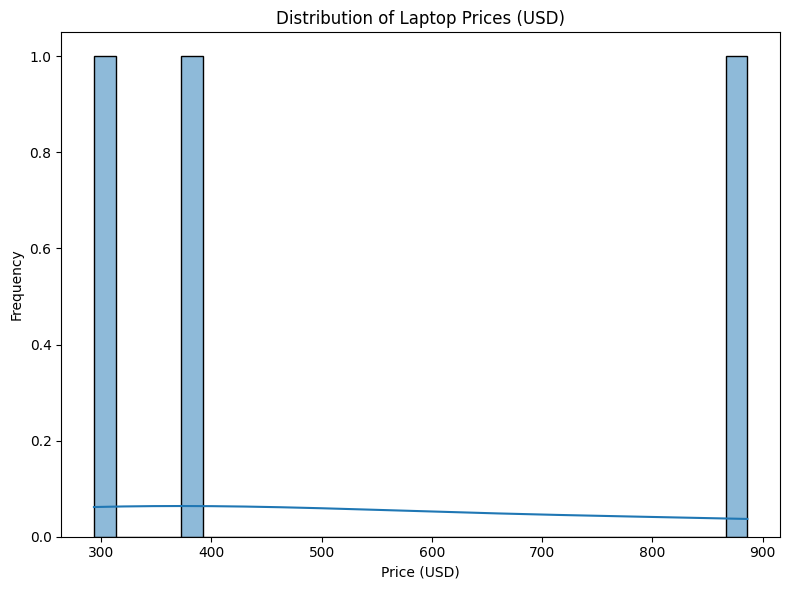

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(data_model['Price (USD)'], kde=True, bins=30)
plt.title('Distribution of Laptop Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

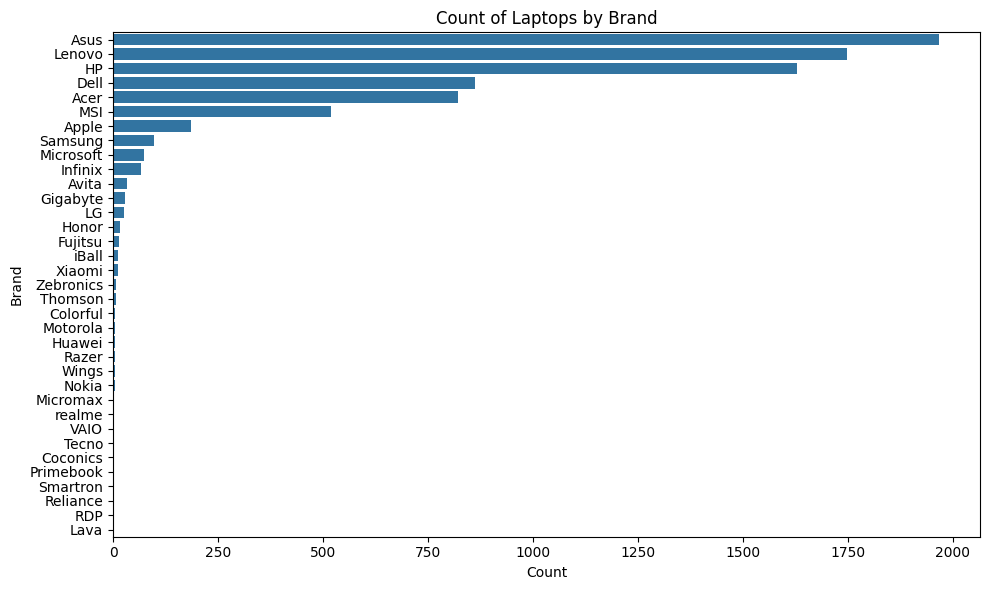

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Brand', data=data, order=data['Brand'].value_counts().index)
plt.title('Count of Laptops by Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

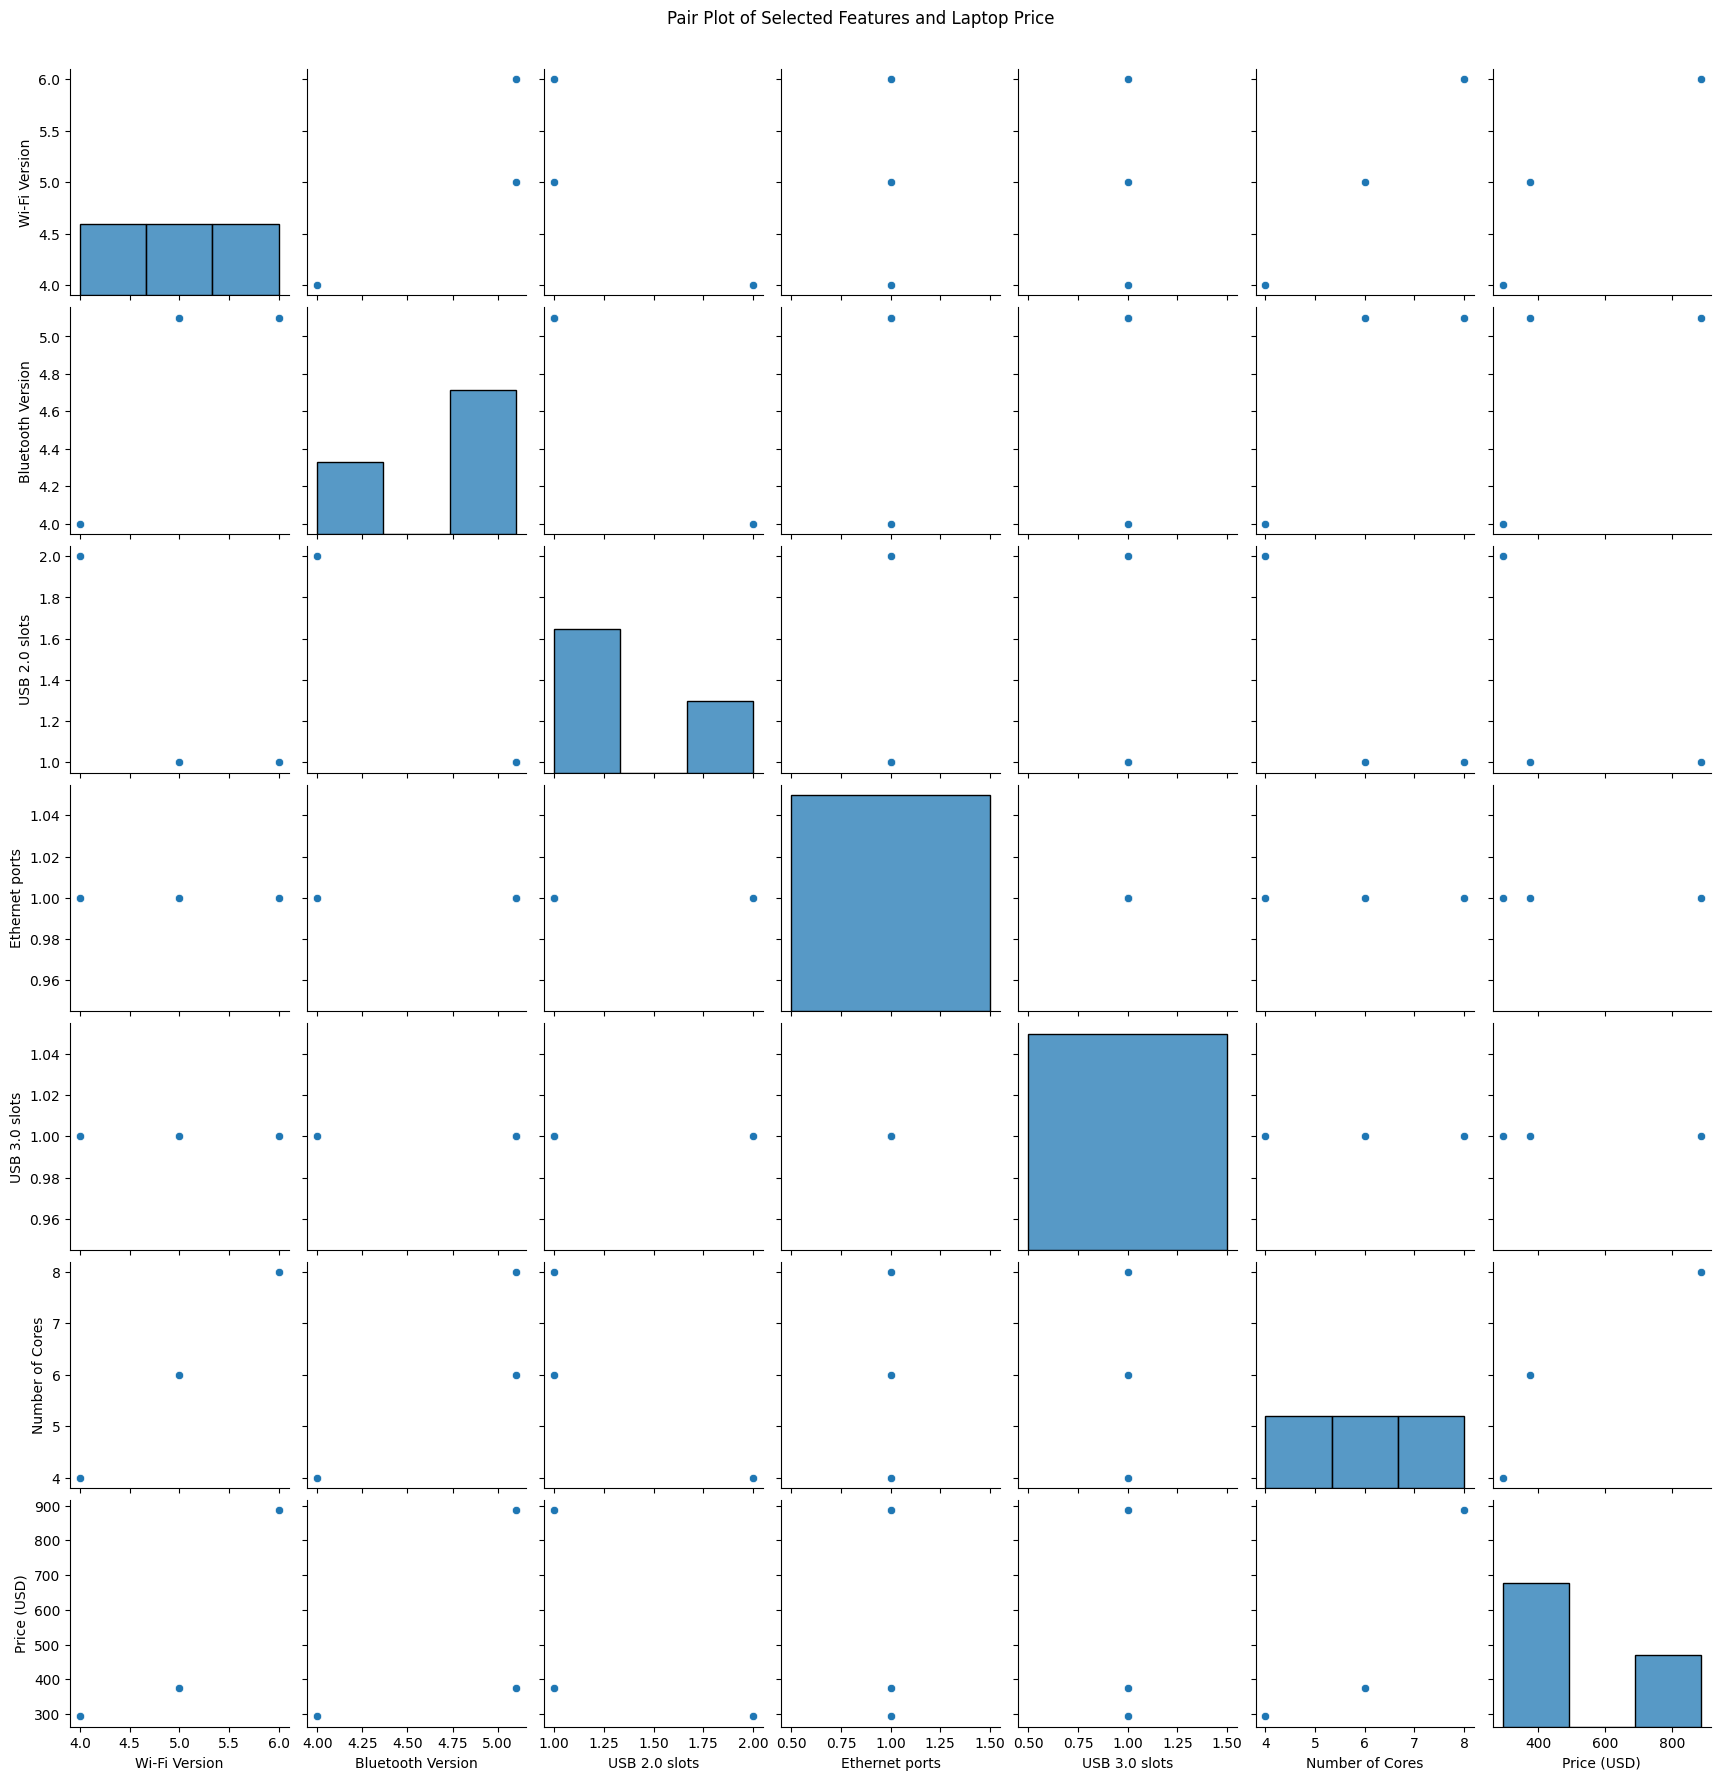

In [26]:
sns.pairplot(data_model[model_features + ['Price (USD)']])
plt.suptitle('Pair Plot of Selected Features and Laptop Price', y=1.02)
plt.show()

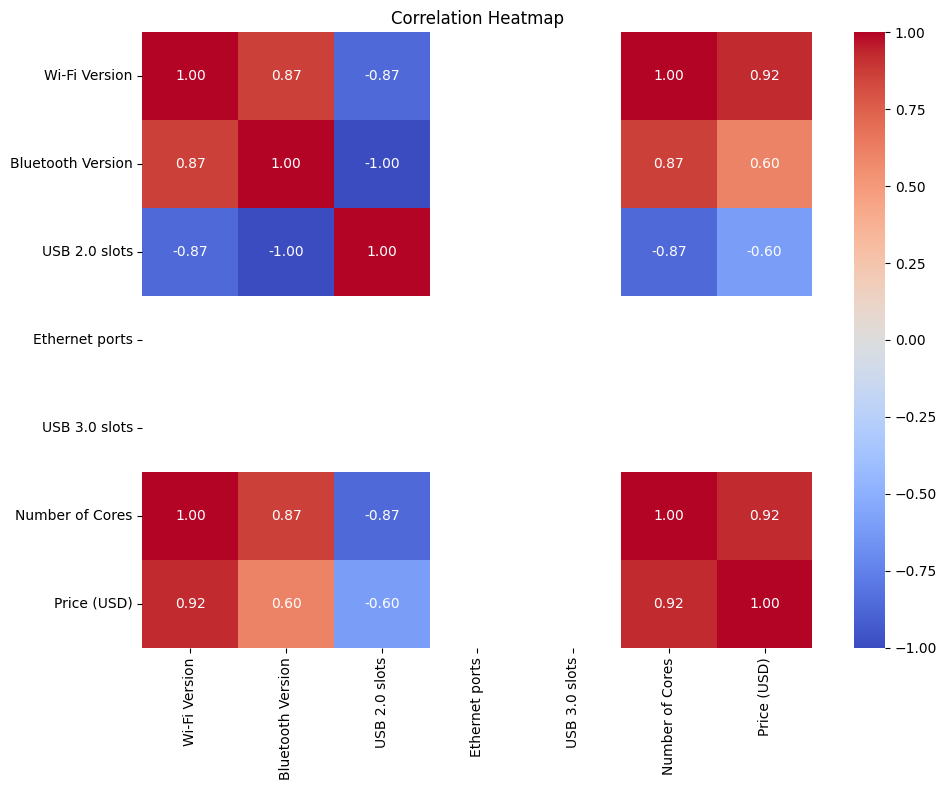

In [27]:
if data_model[model_features + ['Price (USD)']].select_dtypes(include=[np.number]).shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = data_model[model_features + ['Price (USD)']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

In [28]:
X = data_model[model_features]
y = data_model['Price (USD)']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train

,Wi-Fi Version,Bluetooth Version,USB 2.0 slots,Ethernet ports,USB 3.0 slots,Number of Cores
1,4.0,4.0,2.0,1.0,1.0,4.0
2,6.0,5.1,1.0,1.0,1.0,8.0


In [33]:
y_train

1    293.401198
2    886.215569
Name: Price (USD), dtype: float64

In [46]:
model = sm.OLS(y_train, X_train)

In [47]:
result = model.fit()

In [48]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Price (USD)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 20 Jun 2025   Prob (F-statistic):                nan
Time:                        16:59:00   Log-Likelihood:                 54.633
No. Observations:                   2   AIC:                            -105.3
Df Residuals:                       0   BIC:                            -107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Wi-Fi Version        23.8802        in

/home/azuredsrpuser/dsrp-ml-notebooks/.venv/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/home/azuredsrpuser/dsrp-ml-notebooks/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/azuredsrpuser/dsrp-ml-notebooks/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/azuredsrpuser/dsrp-ml-notebooks/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [40]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
y_pred = rf_model.predict(X_test)

In [43]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

/home/azuredsrpuser/dsrp-ml-notebooks/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [44]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)

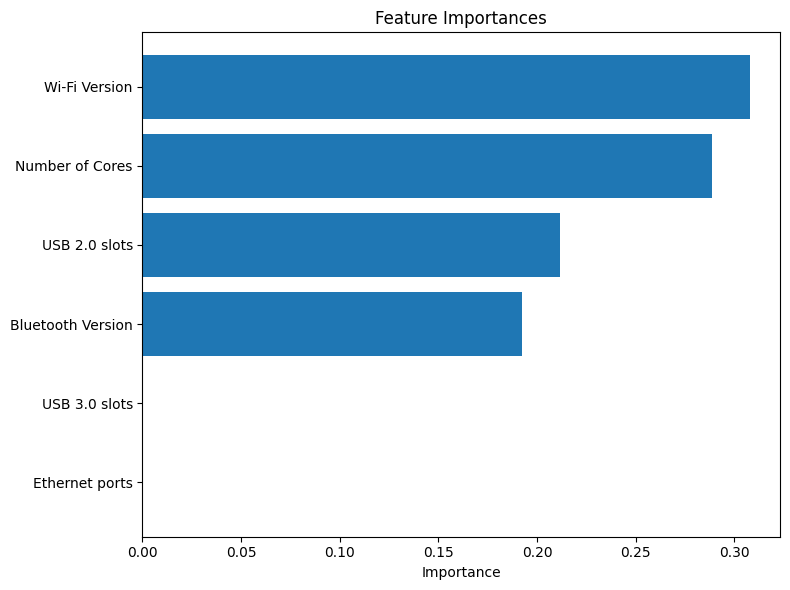

In [45]:
plt.figure(figsize=(8, 6))
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [model_features[i] for i in indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()